<a href="https://colab.research.google.com/github/purvasingh96/Deep-learning-with-neural-networks/blob/master/Chapter-wise%20code/Code%20-%20PyTorch/2.%20Convolution%20Neural%20Networks/7.%20Weight%20Initialization%20Strategies/Weight_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weight Initialization
In this lesson, you'll learn how to find good initial weights for a neural network. Weight initialization happens once, when a model is created and before it trains. Having good initial weights can place the neural network close to the optimal solution. This allows the neural network to come to the best solution quicker. 

<img src="https://github.com/purvasingh96/Deep-learning-with-neural-networks/blob/master/Chapter-wise%20code/Code%20-%20PyTorch/2.%20Convolution%20Neural%20Networks/7.%20Weight%20Initialization%20Strategies/notebook_ims/neuron_weights.png?raw=1" width=40%/>


## Initial Weights and Observing Training Loss

To see how different weights perform, we'll test on the same dataset and neural network. That way, we know that any changes in model behavior are due to the weights and not any changing data or model structure. 
> We'll instantiate at least two of the same models, with _different_ initial weights and see how the training loss decreases over time, such as in the example below. 

<img src="https://github.com/purvasingh96/Deep-learning-with-neural-networks/blob/master/Chapter-wise%20code/Code%20-%20PyTorch/2.%20Convolution%20Neural%20Networks/7.%20Weight%20Initialization%20Strategies/notebook_ims/loss_comparison_ex.png?raw=1" width=60%/>

Sometimes the differences in training loss, over time, will be large and other times, certain weights offer only small improvements.

### Dataset and Model

We'll train an MLP to classify images from the [Fashion-MNIST database](https://github.com/zalandoresearch/fashion-mnist) to demonstrate the effect of different initial weights. As a reminder, the FashionMNIST dataset contains images of clothing types; `classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']`. The images are normalized so that their pixel values are in a range [0.0 - 1.0).  Run the cell below to download and load the dataset.

---

### Import Libraries and Load [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

In [0]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler 

In [0]:
num_workers = 0
batch_size = 100
valid_size = 0.2

transformTensor = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transformTensor)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transformTensor)

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split_idx = int(np.floor(valid_size*num_train))
train_idx, valid_idx = indices[split_idx:], indices[:split_idx]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, num_workers=num_workers, batch_size=batch_size, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, num_workers=num_workers, batch_size=batch_size, sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

# specify image class
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Visualize Some Training Data


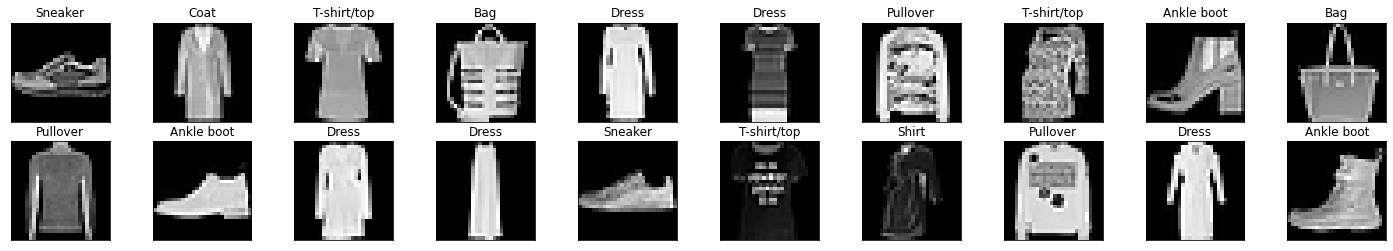

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(classes[labels[idx]])

# Initialize Weights
## All Zeros or Ones

Use  PyTorch's [nn.init](https://pytorch.org/docs/stable/nn.html#torch-nn-init) to initialize each Linear layer with a constant weight. The init library provides a number of weight initialization functions that give you the ability to initialize the weights of each layer according to layer type.

In the case below, we look at every layer/module in our model. If it is a Linear layer (as all three layers are for this MLP), then we initialize those layer weights to be a `constant_weight` with bias=0 using the following code:
>```
if isinstance(m, nn.Linear):
    nn.init.constant_(m.weight, constant_weight)
    nn.init.constant_(m.bias, 0)
```

The `constant_weight` is a value that you can pass in when you instantiate the model.

In [0]:
import torch.nn as nn
import torch.nn.functional as F


In [0]:
class Net(nn.Module):
  def __init__(self, hidden_1=256, hidden_2=128, constant_weight=None):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, hidden_1)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    self.fc3 = nn.Linear(hidden_2, 10)
    self.dropout = nn.Dropout(0.2)

    if constant_weight is not None:
      for m in self.modules():
        if isinstance(m, nn.Linear):
          nn.init.constant_(m.weight, constant_weight)
          nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
      x = x.view(-1, 28*28)
      x = F.relu(self.fc1(x))
      x = self.dropout(x)
      x = F.relu(self.fc2(x))
      x = self.dropout(x)
      x= self.fc3(x)
      return x

# Compare Model Behaviour
Using **helpers.py** we wil compare the 2 models with constant_weights 0 and 1

In [0]:
model_0 = Net(constant_weight=0)
model_1 = Net(constant_weight=1)

In [10]:
import helpers

ModuleNotFoundError: ignored